In [1]:
#@title Download dataset

from google.colab import files
files.upload()

Saving predict.csv to predict.csv
Saving training.csv to training.csv


{'predict.csv': b'id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,number_of_comments,reactivity,is_mentions_me,is_mentions_connections,is_commented_by_me,is_commented_by_connections,is_liked_by_me,is_liked_by_connections,poster_id,poster_gender,poster_is_employee,poster_is_lead,poster_is_in_connections,poster_focus,poster_order,poster_influence,participant1_id,participant1_action,participant1_gender,participant1_is_employee,participant1_is_lead,participant1_is_in_connections,participant1_focus,participant1_order,participant1_influence,participant2_id,participant2_action,participant2_gender,participant2_is_employee,participant2_is_lead,participant2_is_in_connections,participant2_focus,participant2_order,participant2_influence,participant3_id,participant3_action,participant3_gender,participant3_is_employee,participant3_is_lead,participant3_is_in_connections,participant3_focus,participant3_order,participant3_influence,participant4_i

In [2]:
import pandas as pd
import numpy as np

import datetime
import time

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train_df = pd.read_csv("training.csv")
test_df = pd.read_csv("predict.csv")

In [4]:
train_df.shape

(9418, 72)

In [5]:
train_df.head()

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,number_of_comments,reactivity,is_mentions_me,is_mentions_connections,is_commented_by_me,is_commented_by_connections,is_liked_by_me,is_liked_by_connections,poster_id,poster_gender,poster_is_employee,poster_is_lead,poster_is_in_connections,poster_focus,poster_order,poster_influence,participant1_id,participant1_action,participant1_gender,participant1_is_employee,participant1_is_lead,participant1_is_in_connections,participant1_focus,participant1_order,participant1_influence,participant2_id,participant2_action,participant2_gender,participant2_is_employee,participant2_is_lead,participant2_is_in_connections,participant2_focus,participant2_order,participant2_influence,participant3_id,participant3_action,participant3_gender,participant3_is_employee,participant3_is_lead,participant3_is_in_connections,participant3_focus,participant3_order,participant3_influence,participant4_id,participant4_action,participant4_gender,participant4_is_employee,participant4_is_lead,participant4_is_in_connections,participant4_focus,participant4_order,participant4_influence,participant5_id,participant5_action,participant5_gender,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank
0,175339,1.514050e+12,1.514050e+12,6.315242e+10,6.315242e+10,other,57727,space,0.99973,1,0,1.00000,0,0,0,0,0,1,5,male,1,0,1,marketing,6,0.99962,146,liked,male,1,0,1,marketing,5,0.99899,22636,viewed,male,0,0,1,other,4,0.23077,3080,viewed,male,0,0,1,marketing,3,0.23077,44661,viewed,male,0,0,1,other,2,0.23077,3089,viewed,male,0,0,1,other,1,0.23077,0.73677
1,175348,1.514110e+12,1.515160e+12,6.309278e+10,6.204696e+10,forum,111913,space,0.99977,0,2,0.12336,0,0,0,1,0,0,146,male,1,0,1,marketing,6,0.99899,13659,commented,male,0,0,0,other,5,0.99756,146,commented,male,1,0,1,marketing,4,0.99899,22636,viewed,male,0,0,1,other,3,0.23077,3080,viewed,male,0,0,1,marketing,2,0.23077,44661,viewed,male,0,0,1,other,1,0.23077,0.78240
2,175353,1.514120e+12,1.515160e+12,6.309049e+10,6.204716e+10,forum,111913,space,0.99977,0,3,0.12336,0,0,0,1,0,0,146,male,1,0,1,marketing,6,0.99899,13659,commented,male,0,0,0,other,5,0.99756,13,commented,male,1,0,1,marketing,4,0.99895,146,commented,male,1,0,1,marketing,3,0.99899,22636,viewed,male,0,0,1,other,2,0.23077,3080,viewed,male,0,0,1,marketing,1,0.23077,0.82125
3,175371,1.514190e+12,1.514190e+12,6.301324e+10,6.301324e+10,other,9037,space,0.99949,0,0,0.00000,0,0,0,0,0,0,7,male,1,0,1,marketing,6,0.99886,22636,viewed,male,0,0,1,other,5,0.23077,3080,viewed,male,0,0,1,marketing,4,0.23077,44661,viewed,male,0,0,1,other,3,0.23077,3089,viewed,male,0,0,1,other,2,0.23077,3084,viewed,male,0,0,1,marketing,1,0.23077,0.61522
4,175372,1.514190e+12,1.514190e+12,6.301323e+10,6.301323e+10,other,9037,space,0.99949,0,0,0.00000,0,0,0,0,0,0,7,male,1,0,1,marketing,6,0.99886,22636,viewed,male,0,0,1,other,5,0.23077,3080,viewed,male,0,0,1,marketing,4,0.23077,44661,viewed,male,0,0,1,other,3,0.23077,3089,viewed,male,0,0,1,other,2,0.23077,3084,viewed,male,0,0,1,marketing,1,0.23077,0.61522


In [0]:
# convert time from milisenconds to seconds
train_df.posted_time /= 1000
train_df.updated_time /= 1000
train_df.age /= 1000
train_df.updated_age /= 1000

# **Posted_time analysis**

Here I'll be analysing posted_time variable, figure out how we can represent correctly it and divide it on buckets.

In [0]:
def get_date(secs):
  return datetime.datetime.fromtimestamp(secs).strftime("%A, %d/%m/%Y %H:%M:%S")

def get_date_separated(secs):
  date = datetime.datetime.fromtimestamp(secs)
  # return year, month, weekday, date(day),  hour, min, secs
  return int(date.strftime("%Y")), int(date.strftime("%m")), date.strftime("%A"), int(date.strftime("%d")), int(date.strftime("%H")), int(date.strftime("%M")), int(date.strftime("%S"))

## Understand posted date in the dataset and its correlations

In [9]:
train_df.posted_time.describe()

count    9.418000e+03
mean     1.543272e+09
std      1.738320e+07
min      1.372140e+09
25%      1.530010e+09
50%      1.545060e+09
75%      1.556120e+09
max      1.573060e+09
Name: posted_time, dtype: float64

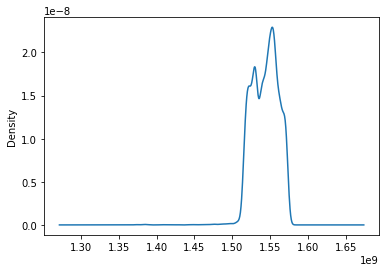

In [10]:
# plot distribution of the values
train_df.posted_time.plot.kde()

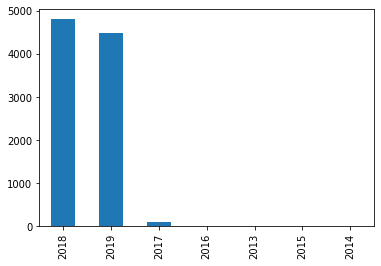

In [11]:
# plot distribution by years
pd.Series([get_date_separated(i)[0] for i in train_df.posted_time]).value_counts().plot(kind="bar")

As we can see, there are few outliers in terms of years, so I'll filter them, to get data only for last 2 years (2018-2019)

In [20]:
# first day of the 2018 year, all previous dates will be removed from the dataset

start_of_2018 = "1/1/2018"
start_secs = time.mktime(datetime.datetime.strptime(start_of_2018, "%d/%m/%Y").timetuple())

get_date(start_secs)

'Monday, 01/01/2018 00:00:00'

In [21]:
filtered_data = [e for e in  filter(lambda x : x > start_secs, train_df.posted_time)]
len(filtered_data)

9280

In [0]:
# remove all dates before 2018 year
new_train_df = train_df[train_df.posted_time.isin(filtered_data)]

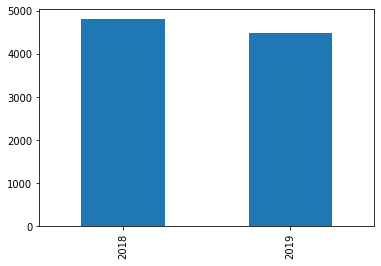

In [15]:
# plot distribution by years
pd.Series([get_date_separated(i)[0] for i in new_train_df.posted_time]).value_counts().plot(kind="bar")

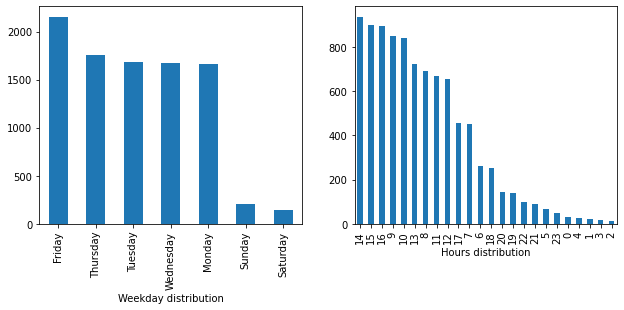

In [16]:
plt.figure(figsize=(16, 4))


plt.subplot(131)
pd.Series([get_date_separated(i)[2] for i in new_train_df.posted_time]).value_counts().plot(kind="bar")
plt.xlabel('Weekday distribution')


plt.subplot(132)
pd.Series([get_date_separated(i)[4] for i in new_train_df.posted_time]).value_counts().plot(kind="bar")
plt.xlabel('Hours distribution')

plt.show()

So, we have the most of activity in the working days and in the business time (~ 8-18).

Now, let's check most active hours separately for each working day.

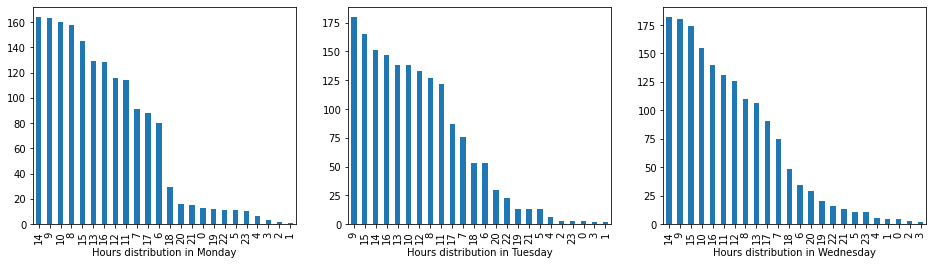

In [17]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
pd.Series([get_date_separated(i)[4] for i in new_train_df.posted_time if get_date_separated(i)[2] == "Monday"]).value_counts().plot(kind="bar")
plt.xlabel('Hours distribution in Monday')


plt.subplot(132)
pd.Series([get_date_separated(i)[4] for i in new_train_df.posted_time if get_date_separated(i)[2] == "Tuesday"]).value_counts().plot(kind="bar")
plt.xlabel('Hours distribution in Tuesday')


plt.subplot(133)
pd.Series([get_date_separated(i)[4] for i in new_train_df.posted_time if get_date_separated(i)[2] == "Wednesday"]).value_counts().plot(kind="bar")
plt.xlabel('Hours distribution in Wednesday')

plt.show()

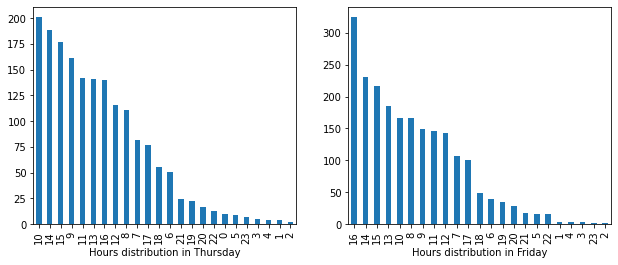

In [18]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
pd.Series([get_date_separated(i)[4] for i in new_train_df.posted_time if get_date_separated(i)[2] == "Thursday"]).value_counts().plot(kind="bar")
plt.xlabel('Hours distribution in Thursday')


plt.subplot(132)
pd.Series([get_date_separated(i)[4] for i in new_train_df.posted_time if get_date_separated(i)[2] == "Friday"]).value_counts().plot(kind="bar")
plt.xlabel('Hours distribution in Friday')

plt.show()

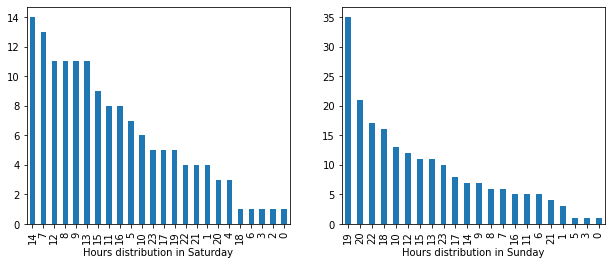

In [19]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
pd.Series([get_date_separated(i)[4] for i in new_train_df.posted_time if get_date_separated(i)[2] == "Saturday"]).value_counts().plot(kind="bar")
plt.xlabel('Hours distribution in Saturday')


plt.subplot(132)
pd.Series([get_date_separated(i)[4] for i in new_train_df.posted_time if get_date_separated(i)[2] == "Sunday"]).value_counts().plot(kind="bar")
plt.xlabel('Hours distribution in Sunday')

plt.show()

Now, let's check correlations of posted_time and others features. 

In [0]:
# take only one variable to check correlation with
posted_time = new_train_df.posted_time

# Pearson correlation
p_corr = new_train_df.corrwith(posted_time, method="pearson")
indx = p_corr.index
p_corr = dict(zip(indx, p_corr))

In [21]:
# sort by value of correlation and print
sorted_p_corrs = [(k, v) for k, v in sorted(p_corr.items(), key=lambda item: item[1])]
sorted_p_corrs

[('age', -0.9999999836787741),
 ('updated_age', -0.9865471167998696),
 ('participant2_is_in_connections', -0.14459773157001282),
 ('participant4_is_in_connections', -0.11251793770064376),
 ('participant3_is_in_connections', -0.11074623638367513),
 ('participant5_is_in_connections', -0.1090397977689792),
 ('poster_is_in_connections', -0.1071745660821824),
 ('is_mentions_connections', -0.09451543261238941),
 ('owner_influence', -0.09239722410802596),
 ('participant1_is_in_connections', -0.09004742169635047),
 ('is_mentions_me', -0.012379756477246878),
 ('owner_id', 0.01042822972442454),
 ('is_commented_by_me', 0.019159349266718233),
 ('is_liked_by_me', 0.02090809697365507),
 ('is_commented_by_connections', 0.029000188066404874),
 ('number_of_comments', 0.04410320930880777),
 ('poster_influence', 0.06546758250254985),
 ('reactivity', 0.0764413003569501),
 ('poster_is_employee', 0.15513784415169316),
 ('poster_id', 0.15984635485835097),
 ('participant4_influence', 0.18018805106536148),
 ('

In [0]:
# Spearman correlation
s_corr = new_train_df.corrwith(posted_time, method="spearman")
indx = s_corr.index
s_corr = dict(zip(indx, s_corr))

In [23]:
# sort by value of correlation and print
sorted_s_corrs = [(k, v) for k, v in sorted(s_corr.items(), key=lambda item: item[1])]
sorted_s_corrs

[('age', -0.9999971130121368),
 ('updated_age', -0.9889213331966522),
 ('participant2_is_in_connections', -0.14308043437943813),
 ('participant4_is_in_connections', -0.1119750968145157),
 ('participant3_is_in_connections', -0.11019396241876389),
 ('participant5_is_in_connections', -0.10738340748651397),
 ('poster_is_in_connections', -0.10667151170201489),
 ('is_mentions_connections', -0.09644574715617368),
 ('participant1_is_in_connections', -0.08957581720230083),
 ('owner_influence', -0.0454638752699521),
 ('poster_influence', -0.0390585054489501),
 ('is_mentions_me', -0.012104788631301195),
 ('owner_id', 0.011828198290499746),
 ('is_commented_by_me', 0.018430582770944844),
 ('is_liked_by_me', 0.020133656135645467),
 ('is_commented_by_connections', 0.02964761369396826),
 ('participant1_influence', 0.05463906666279597),
 ('number_of_comments', 0.05720851839617039),
 ('reactivity', 0.08088122362854228),
 ('participant2_influence', 0.10822163278263604),
 ('participant3_id', 0.13507561287

## **Equation to describe activity freshness**
Here I'll be creating new synthetic feature - **effective_age**.
As you can see from previous section, each workday has peak of activity (posting activity) , and I assume that reading activity in general will have similar distribution for each workday. For each post effective_age will be a random value from certain interval which depends on how close to peak post_time is. For peak post this interval will be [10min, 2h] and [30min-4h] for others.

Peak times for each workday:

**Mon**: 8, 9, 10 AM

**Tue**: 13, 14, 15 PM

**Wed**: 14, 15, 16 PM

**Thu**: 9, 10, 11 AM

**Fri**: 14, 15, 16 PM


\

\




\* *This is not final solution, equation, value intervals etc. can be changed in the future.* 

In [0]:
# one minute = 60 secs
one_min = 60
one_hour = 60 * one_min

# define random values intervals
peak_interval = (10 * one_min, 2 * one_hour)
nonpeak_interval = (30 * one_min, 4 * one_hour)

# define start of peak time for each day

day2peak = {
    "Monday" : 8,
    "Tuesday" : 13,
    "Wednesday" : 14,
    "Thursday" : 9,
    "Friday" : 14
}

In [0]:
# return year, month, weekday, date(day),  hour, min, secs

def is_peak(secs):
  date = get_date_separated(secs)

  # if post was publicated on weekends, assume that it will be readed faster in the Monday, so we take smaller interval
  weekday = date[2]
  if weekday == 'Saturday' or weekday == 'Sunday':
    return True

  # take start of the peak time from the date in seconds
  start = day2peak[weekday] * one_hour
  # define end as 3 hours after start
  end = start + 3 * one_hour
  
  # define current time in terms of seconds - seconds in hours + seconds in minutes and seconds
  current_secs = (one_hour * date[4]) + (one_min * date[5]) + date[6]

  return start <= current_secs  <= end


In [0]:
import random

def create_effective_age(posted_time):
  effective_age = []

  for t in posted_time:
    if is_peak(t):
      effective_age.append(random.randint(peak_interval[0], peak_interval[1]))
    else:
      effective_age.append(random.randint(nonpeak_interval[0], nonpeak_interval[1])) 

  return pd.Series(effective_age)


In [50]:
new_train_df["effective_age"] = create_effective_age(new_train_df.posted_time)
new_train_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,number_of_comments,reactivity,is_mentions_me,is_mentions_connections,is_commented_by_me,is_commented_by_connections,is_liked_by_me,is_liked_by_connections,poster_id,poster_gender,poster_is_employee,poster_is_lead,poster_is_in_connections,poster_focus,poster_order,poster_influence,participant1_id,participant1_action,participant1_gender,participant1_is_employee,participant1_is_lead,participant1_is_in_connections,participant1_focus,participant1_order,participant1_influence,participant2_id,participant2_action,participant2_gender,participant2_is_employee,participant2_is_lead,participant2_is_in_connections,participant2_focus,participant2_order,participant2_influence,participant3_id,participant3_action,participant3_gender,participant3_is_employee,participant3_is_lead,participant3_is_in_connections,participant3_focus,participant3_order,participant3_influence,participant4_id,participant4_action,participant4_gender,participant4_is_employee,participant4_is_lead,participant4_is_in_connections,participant4_focus,participant4_order,participant4_influence,participant5_id,participant5_action,participant5_gender,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank,effective_age
51,175684,1.514880e+09,1.515140e+09,6.232333e+07,6.206286e+07,other,3201,space,0.99992,30,6,0.310842,0,1,0,1,0,1,5,male,1,0,1,marketing,6,0.99962,38,commented,female,1,0,1,marketing,5,0.99825,13,commented,male,1,0,1,marketing,4,0.99895,110965,commented,male,0,0,1,marketing,3,0.99861,10,commented,male,1,0,1,marketing,2,0.99902,7,commented,male,1,0,1,marketing,1,0.99886,0.87644,6642.0
52,175698,1.514890e+09,1.514890e+09,6.231682e+07,6.231682e+07,other,9037,space,0.99949,0,0,0.000000,0,0,0,0,0,0,1,male,1,0,1,sales,6,0.99645,22636,viewed,male,0,0,1,other,5,0.23077,3080,viewed,male,0,0,1,marketing,4,0.23077,44661,viewed,male,0,0,1,other,3,0.23077,3089,viewed,male,0,0,1,other,2,0.23077,3084,viewed,male,0,0,1,marketing,1,0.23077,0.61486,12423.0
53,175714,1.514900e+09,1.514910e+09,6.230383e+07,6.230069e+07,other,13853,space,0.10000,1,2,0.000000,0,1,0,1,0,1,78,female,1,0,1,marketing,6,0.99808,121,commented,male,1,0,1,marketing,5,0.99919,62,commented,male,1,0,1,marketing,4,0.99586,37,commented,female,1,0,1,marketing,3,0.99339,5,commented,male,1,0,1,marketing,2,0.99962,22636,viewed,male,0,0,1,other,1,0.23077,0.85888,13812.0
54,175728,1.514910e+09,1.519330e+09,6.229707e+07,5.787155e+07,forum,111913,space,0.99977,1,3,0.000000,0,0,0,1,0,1,5,male,1,0,1,marketing,6,0.99962,13659,commented,male,0,0,0,other,5,0.99756,16,commented,male,0,0,1,other,4,0.99630,5,commented,male,1,0,1,marketing,3,0.99962,121,liked,male,1,0,1,marketing,2,0.99919,22636,viewed,male,0,0,1,other,1,0.23077,0.85278,10002.0
55,175779,1.514980e+09,1.515490e+09,6.222975e+07,6.171553e+07,other,27310,space,0.99980,1,5,0.229476,0,1,0,1,0,1,121,male,1,0,1,marketing,6,0.99919,1,commented,male,1,0,1,sales,5,0.99645,121,commented,male,1,0,1,marketing,4,0.99919,67,commented,female,0,0,1,marketing,3,0.99806,108025,commented,male,1,0,0,marketing,2,0.99891,151,commented,male,1,0,1,marketing,1,0.99811,0.87639,2501.0


# **Effective_age**
Here I'll proceed with new synthetic feature named effective_age

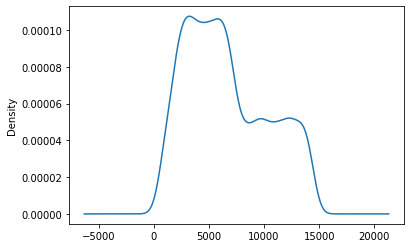

In [51]:
new_train_df.effective_age.plot.kde()

As first trial, I'll proceed with next buckets: 20min, 40min, 1h, 1.5h, 2h, 2.5h, 3h, 4h.

# **Age column investigation**
Here I'll research and investigate how do we can proceed with 'age' column

In [0]:
# date of dataset creation
DATE = '4/02/2020'

current_date = datetime.datetime.strptime(DATE, "%d/%m/%Y")
current_secs = time.mktime(current_date.timetuple())

In [0]:
def get_date(secs):
  return datetime.datetime.fromtimestamp(current_secs - secs).strftime("%A, %B %d, %Y %I:%M:%S")

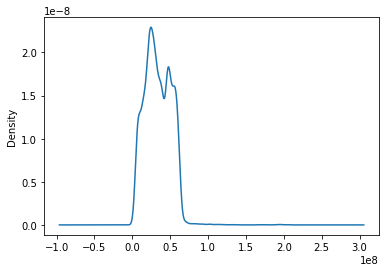

In [0]:
train_df.age.plot.kde()

In [0]:
train_df.age.describe()

count    9.418000e+03
mean     3.393422e+07
std      1.738314e+07
min      4.147070e+06
25%      2.108517e+07
50%      3.214917e+07
75%      4.719412e+07
max      2.050660e+08
Name: age, dtype: float64

In [0]:
# first day of the 2018 year, all previous dates will be removed from the dataset
get_date(6.6 * 1e+07)

'Monday, January 01, 2018 02:40:00'

In [0]:
filtered_data = [e for e in  filter(lambda x : x < 6.6 * 1e+07, sorted(train_df.age))]
len(filtered_data)

9339

In [0]:
# remove all dates before 2018 year
train_df = train_df[train_df.age.isin(filtered_data)]

In [0]:
train_df.age.describe()

count    9.339000e+03
mean     3.339512e+07
std      1.605928e+07
min      4.147070e+06
25%      2.100618e+07
50%      3.193247e+07
75%      4.697468e+07
max      6.472692e+07
Name: age, dtype: float64

In [0]:
# first and  last days of new data
get_date(4.147070e+06), get_date(6.472692e+07)

('Wednesday, December 18, 2019 12:02:10', 'Monday, January 15, 2018 08:18:00')

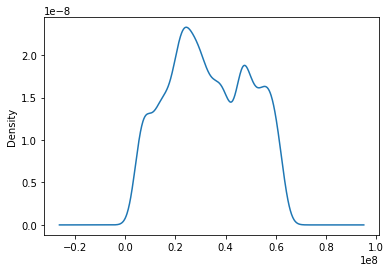

In [0]:
train_df.age.plot.kde()

In [0]:
# function to count number of post in each month for 2018 and 2019 years
def count_posts_per_month(ages):
  dates = [get_date(a) for a in ages]

  months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
  
  count_2018 = {m : 0 for m in months}
  count_2019 = {m : 0 for m in months}


  for date in dates:
    date_splitted = date.split(" ")
    month = date_splitted[1]
    year = date_splitted[3]

    if year == "2018":
      count_2018[month] += 1
    elif year == "2019":
      count_2019[month] += 1
    else:
      print(date)
  
  return count_2018, count_2019


In [0]:
def plot_posts_by_month(counts):
  plt.bar(range(len(counts)), list(counts.values()), align='center')
  plt.xticks(range(len(counts)), list(counts.keys()))
  plt.show()


In [0]:
counts = count_posts_per_month(filtered_data)

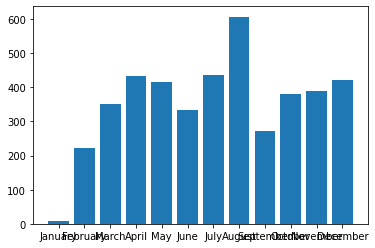

In [0]:
# 2018 year
plot_posts_by_month(counts[0])

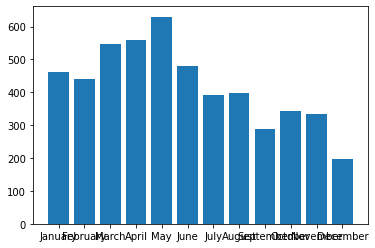

In [0]:
# 2019 year
plot_posts_by_month(counts[1])

# **Prediction data analysis**

In [6]:
test_df.head()

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,number_of_comments,reactivity,is_mentions_me,is_mentions_connections,is_commented_by_me,is_commented_by_connections,is_liked_by_me,is_liked_by_connections,poster_id,poster_gender,poster_is_employee,poster_is_lead,poster_is_in_connections,poster_focus,poster_order,poster_influence,participant1_id,participant1_action,participant1_gender,participant1_is_employee,participant1_is_lead,participant1_is_in_connections,participant1_focus,participant1_order,participant1_influence,participant2_id,participant2_action,participant2_gender,participant2_is_employee,participant2_is_lead,participant2_is_in_connections,participant2_focus,participant2_order,participant2_influence,participant3_id,participant3_action,participant3_gender,participant3_is_employee,participant3_is_lead,participant3_is_in_connections,participant3_focus,participant3_order,participant3_influence,participant4_id,participant4_action,participant4_gender,participant4_is_employee,participant4_is_lead,participant4_is_in_connections,participant4_focus,participant4_order,participant4_influence,participant5_id,participant5_action,participant5_gender,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence
0,273721,1.575530e+12,1.575530e+12,1.686167e+09,1.686167e+09,other,57727,space,0.99973,13,7,0,0,1,0,1,0,1,119825,female,1,0,0,other,6,0.99754,5,commented,male,1,0,1,marketing,5,0.99962,129104,commented,female,1,0,0,marketing,4,0.99500,4,commented,male,1,0,1,marketing,3,0.99867,41,commented,male,1,0,1,sales,2,0.99828,7,commented,male,1,0,1,marketing,1,0.99886
1,273985,1.575580e+12,1.575580e+12,1.634145e+09,1.634145e+09,other,3201,space,0.99992,4,0,0,0,0,0,0,0,1,119825,female,1,0,0,other,6,0.99754,122534,liked,male,1,0,1,marketing,5,0.99678,10,liked,male,1,0,1,marketing,4,0.99902,7,liked,male,1,0,1,marketing,3,0.99886,5,liked,male,1,0,1,marketing,2,0.99962,22636,viewed,male,0,0,1,other,1,0.23077
2,273750,1.575540e+12,1.575540e+12,1.681664e+09,1.681664e+09,other,57727,space,0.99973,2,5,0,0,1,0,1,0,1,129104,female,1,0,0,marketing,6,0.99500,109375,commented,male,1,0,1,marketing,5,0.99715,129104,commented,female,1,0,0,marketing,4,0.99500,4,commented,male,1,0,1,marketing,3,0.99867,108025,commented,male,1,0,0,marketing,2,0.99891,7,commented,male,1,0,1,marketing,1,0.99886
3,273302,1.575370e+12,1.575370e+12,1.852591e+09,1.852591e+09,other,126877,space,0.50000,0,2,0,0,0,0,1,0,0,7,male,1,0,1,marketing,6,0.99886,108025,commented,male,1,0,0,marketing,5,0.99891,7,commented,male,1,0,1,marketing,4,0.99886,22636,viewed,male,0,0,1,other,3,0.23077,3080,viewed,male,0,0,1,marketing,2,0.23077,44661,viewed,male,0,0,1,other,1,0.23077
4,273897,1.575560e+12,1.575560e+12,1.661083e+09,1.661083e+09,other,57727,space,0.99973,4,5,0,0,0,0,1,0,1,109375,male,1,0,1,marketing,6,0.99715,108025,commented,male,1,0,0,marketing,5,0.99891,5,commented,male,1,0,1,marketing,4,0.99962,129104,commented,female,1,0,0,marketing,3,0.99500,146,commented,male,1,0,1,marketing,2,0.99899,4,commented,male,1,0,1,marketing,1,0.99867


In [0]:
test_df.shape

(100, 71)

In [0]:
# conver to seconds
test_df.posted_time /= 1000

In [0]:
get_date(test_df.posted_time[0])

'Thursday, 05/12/2019 07:13:20'

In [0]:
get_date_separated(test_df.posted_time[0])

(2019, 12, 'Thursday', 7, 5)

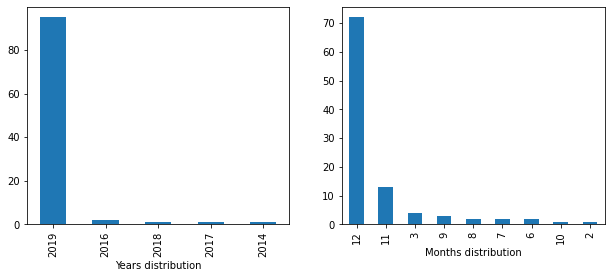

In [0]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
pd.Series([get_date_separated(i)[0] for i in test_df.posted_time]).value_counts().plot(kind="bar")
plt.xlabel('Years distribution')

plt.subplot(132)
pd.Series([get_date_separated(i)[1] for i in test_df.posted_time]).value_counts().plot(kind="bar")
plt.xlabel('Months distribution')

plt.show()

Text(0.5, 0, 'Hours distribution')

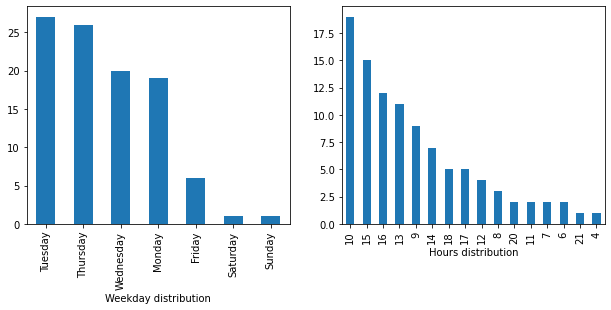

In [0]:
plt.figure(figsize=(16, 4))


plt.subplot(131)
pd.Series([get_date_separated(i)[2] for i in test_df.posted_time]).value_counts().plot(kind="bar")
plt.xlabel('Weekday distribution')


plt.subplot(132)
pd.Series([get_date_separated(i)[3] for i in test_df.posted_time]).value_counts().plot(kind="bar")
plt.xlabel('Hours distribution')


In [0]:
filtered_data = [e for e in  filter(lambda x : get_date_separated(x)[0] == 2019, test_df.posted_time)]
len(filtered_data)

95

In [0]:
# remove all dates before 2019 year
new_test_df = test_df[test_df.posted_time.isin(filtered_data)]

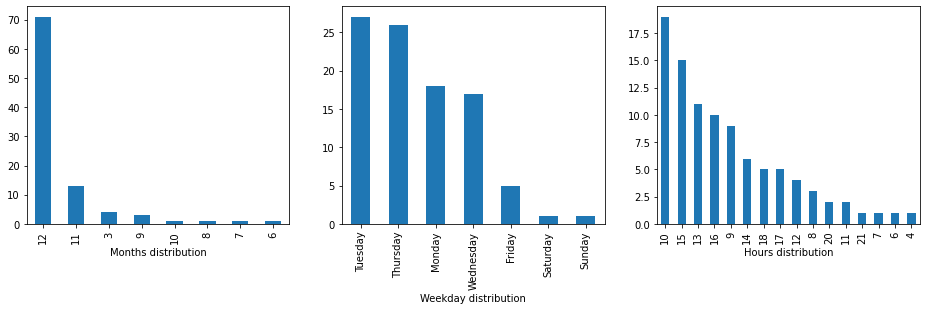

In [0]:
# plot prediction data only for 2019 year 
plt.figure(figsize=(16, 4))

plt.subplot(131)
pd.Series([get_date_separated(i)[1] for i in new_test_df.posted_time]).value_counts().plot(kind="bar")
plt.xlabel('Months distribution')

plt.subplot(132)
pd.Series([get_date_separated(i)[2] for i in new_test_df.posted_time]).value_counts().plot(kind="bar")
plt.xlabel('Weekday distribution')


plt.subplot(133)
pd.Series([get_date_separated(i)[3] for i in new_test_df.posted_time]).value_counts().plot(kind="bar")
plt.xlabel('Hours distribution')

plt.show()

In [0]:
# filter posted_time for December 2019, month with majority of the posts
filtered_by_month = [get_date_separated(e)[3] for e in  filter(lambda x : get_date_separated(x)[1] == 12, new_test_df.posted_time)]
december = pd.Series(sorted(filtered_by_month))

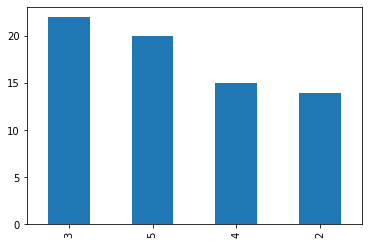

In [0]:
december.value_counts().plot(kind="bar")